In [1]:
# get train files
import glob

train_folders = ['CAR', 'UAH', 'UJITI', 'UJIUB']

train_files_names = []
n_files = 0
for building in train_folders:
    cur_file_names = glob.glob('train/' + building + '/log*')
    train_files_names.append(sorted(cur_file_names))
    n_files += len(cur_file_names)

print(train_files_names)
print('There are %d training files' % n_files)

[['train/CAR\\logfile_CAR_R1_S3.txt', 'train/CAR\\logfile_CAR_R1_S3mini.txt', 'train/CAR\\logfile_CAR_R2_S3.txt', 'train/CAR\\logfile_CAR_R2_S4.txt'], ['train/UAH\\logfile_UAH_R1_S3.txt', 'train/UAH\\logfile_UAH_R1_S4.txt', 'train/UAH\\logfile_UAH_R2_S3.txt', 'train/UAH\\logfile_UAH_R2_S4.txt', 'train/UAH\\logfile_UAH_R4_S3.txt', 'train/UAH\\logfile_UAH_R4_S4.txt'], ['train/UJITI\\logfile_UJITI_R1_NEXUS5.txt', 'train/UJITI\\logfile_UJITI_R2_NEXUS5.txt'], ['train/UJIUB\\logfile_UJIUB_R1n_S3.txt', 'train/UJIUB\\logfile_UJIUB_R1r_S3.txt', 'train/UJIUB\\logfile_UJIUB_R2n_S3.txt', 'train/UJIUB\\logfile_UJIUB_R2r_S3.txt', 'train/UJIUB\\logfile_UJIUB_R3_S3.txt']]
There are 17 training files


In [2]:
# import files into dataframe
import numpy as np
import pandas as pd

track_data = []
for building in train_files_names:
    track_data.append([])
    for track_name in building:
        print(track_name)
        track_data[-1].append(pd.read_csv(track_name, sep=';', engine='c', names=range(11)))
        print(np.unique(track_data[-1][-1][0]))

train/CAR\logfile_CAR_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/CAR\logfile_CAR_R1_S3mini.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'MAGN' 'POSI' 'SOUN' 'WIFI']
train/CAR\logfile_CAR_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX' 'SOUN'
 'WIFI']
train/CAR\logfile_CAR_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX'
 'SOUN' 'TEMP' 'WIFI']
train/UAH\logfile_UAH_R1_S3.txt


C:\Users\yaia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH\logfile_UAH_R1_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH\logfile_UAH_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH\logfile_UAH_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH\logfile_UAH_R4_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH\logfile_UAH_R4_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UJITI\logfile_UJITI_R1_NEXUS5.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX' 'SOUN'
 'WIFI']
train/UJITI\logfile_UJITI_R2_NEXUS5.txt
['ACCE' 'AHRS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UJIUB\logfile_UJIUB_R1n_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX' 'SOUN'
 'WIFI']
train/UJIUB\logfile_U

In [3]:
# count wifi stations in each track
unique_aps = []
unique_macs = []
for building in track_data:
    for track in building:
        wifi_data = track.iloc[track[0].values == 'WIFI']
        wifi_names = wifi_data[3].values.astype(str)
        wifi_macs = wifi_data[4].values
        unique_aps.append(list(np.unique(wifi_names)))
        unique_macs.append(list(np.unique(wifi_macs)))

In [4]:
# Common items between two lists
def custom_cor(list1, list2):
    count = 0
    for item1 in list1:
        if item1 in list2:
            count += 1
    return count / min(len(list1), len(list2))

aps_cor = np.zeros((n_files, n_files))
mac_cor = np.zeros((n_files, n_files))
for i in range(n_files):
    for j in range(n_files):
        aps_cor[i, j] = custom_cor(unique_aps[i], unique_aps[j])
        mac_cor[i, j] = custom_cor(unique_macs[i], unique_macs[j])

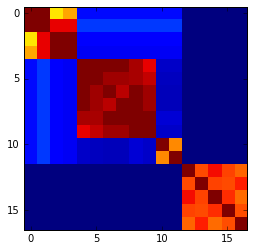

In [5]:
# plot ap names correlation
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(aps_cor, interpolation='nearest')

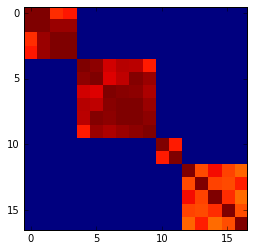

In [6]:
# plot ap macs correlation
plt.imshow(mac_cor, interpolation='nearest')

In [7]:
# Find time limits per POSI id
def posi_time_limits(posi_array):
    # create start and end index time array
    posi_array['ind_begin_time'] = np.zeros((posi_array.shape[0]))
    posi_array['ind_end_time'] = np.zeros((posi_array.shape[0]))
    posi_array['ind_end_time'].iloc[-1] = 99999

    for i in range(1, posi_array.shape[0]):
        cur_split = (float(posi_array['Time'].iloc[i]) + float(posi_array['Time'].iloc[i-1])) / 2
        posi_array['ind_begin_time'].iat[i] = cur_split       
        posi_array['ind_end_time'].iat[i-1] = cur_split       
    return posi_array

track_posi = []
for i in range(len(track_data)):
    track_posi.append([])
    for j in range(len(track_data[i])):
        track_posi[i].append(track_data[i][j][[1, 2, 3, 4, 5, 6, 7]].iloc[track_data[i][j][0].values == 'POSI'])
        track_posi[i][j] = track_posi[i][j].dropna(axis=1)
        track_posi[i][j].columns = ['Time', 'index', 'Lat', 'Lon', 'FloorID', 'BuildingID']
        track_posi[i][j] = posi_time_limits(track_posi[i][j])
print(train_files_names[i][j])
print(track_posi[i][j].head())

C:\Users\yaia\Anaconda3\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


train/UJIUB\logfile_UJIUB_R3_S3.txt
        Time  index         Lat         Lon  FloorID  BuildingID  \
812    3.175    1.0  0.00000000  0.00000000      0.0         0.0   
2499   9.448    2.0  0.00000000  0.00000000      0.0         0.0   
5257  19.942    3.0  0.00000000  0.00000000      0.0         0.0   
7255  27.481    4.0  0.00000000  0.00000000      0.0         0.0   
9233  35.057    5.0  0.00000000  0.00000000      0.0         0.0   

      ind_begin_time  ind_end_time  
812           0.0000        6.3115  
2499          6.3115       14.6950  
5257         14.6950       23.7115  
7255         23.7115       31.2690  
9233         31.2690       36.0605  


In [8]:
# associate signals with POSI ids. Spliting at middle of the time between POSI measurements
for i in range(len(track_data)):
    for j in range(len(track_data[i])):
        print('data: ', i, j)
        track_data[i][j]['POSI_index'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        track_data[i][j]['POSI_floor'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        track_data[i][j]['POSI_building'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        track_data[i][j]['POSI_lat'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        track_data[i][j]['POSI_lon'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        for k in range(track_posi[i][j].shape[0]):
            ind_begin_time = track_posi[i][j]['ind_begin_time'].iloc[k]
            ind_end_time = track_posi[i][j]['ind_end_time'].iloc[k]
    
            ind = track_posi[i][j]['index'].iloc[k]
            ind_floor = track_posi[i][j]['FloorID'].iloc[k]
            ind_building = track_posi[i][j]['BuildingID'].iloc[k]
            ind_lat = track_posi[i][j]['Lat'].iloc[k]
            ind_lon = track_posi[i][j]['Lon'].iloc[k]
            
            index_limits = np.logical_and(track_data[i][j][1].values >= ind_begin_time, 
                                          track_data[i][j][1].values < ind_end_time)
            
            track_data[i][j]['POSI_index'].iloc[index_limits] = ind
            track_data[i][j]['POSI_floor'].iloc[index_limits] = ind_floor
            track_data[i][j]['POSI_building'].iloc[index_limits] = ind_building
            track_data[i][j]['POSI_lat'].iloc[index_limits] = ind_lat
            track_data[i][j]['POSI_lon'].iloc[index_limits] = ind_lon

data:  0 0


C:\Users\yaia\Anaconda3\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


data:  0 1
data:  0 2
data:  0 3
data:  1 0
data:  1 1
data:  1 2
data:  1 3
data:  1 4
data:  1 5
data:  2 0
data:  2 1
data:  3 0
data:  3 1
data:  3 2
data:  3 3
data:  3 4


In [9]:
# create pressure data frames
pres_data = []
for building in track_data:
    pres_data.append([])
    for track in building:
        if track.iloc[track[0].values == 'PRES'].shape[0]:
            pres_data[-1].append(track.iloc[track[0].values == 'PRES'])
            pres_data[-1][-1] = pres_data[-1][-1].dropna(axis=1)
            pres_data[-1][-1] = pres_data[-1][-1].drop(0, axis=1)
            pres_data[-1][-1].columns.values[:4] = ['AppTime', 'SensorTime', 'pres', 'acc']
        else:
            pres_data[-1].append(0)

In [10]:
# filter pressure

train/UJIUB\logfile_UJIUB_R2n_S3.txt
    AppTime  SensorTime      pres acc  POSI_index  POSI_floor  POSI_building  \
2     0.024    1040.916  998.0500   0         1.0         5.0           30.0   
12    0.072    1040.956  998.0231   0         1.0         5.0           30.0   
22    0.097    1040.996  998.0227   0         1.0         5.0           30.0   
33    0.135    1041.036  997.9818   0         1.0         5.0           30.0   
43    0.175    1041.076  998.0162   0         1.0         5.0           30.0   

       POSI_lat    POSI_lon  
2   39.99384147  -0.0737969  
12  39.99384147  -0.0737969  
22  39.99384147  -0.0737969  
33  39.99384147  -0.0737969  
43  39.99384147  -0.0737969  


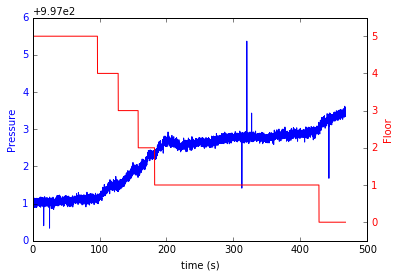

In [11]:
# plot pressure and floor over time
plot_i = 3
plot_j = 2

print(train_files_names[plot_i][plot_j])
print(pres_data[plot_i][plot_j].head())

fig, ax1 = plt.subplots()
ax1.plot(pres_data[plot_i][plot_j]['AppTime'], pres_data[plot_i][plot_j]['pres'], 'b')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Pressure', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(pres_data[plot_i][plot_j]['AppTime'], pres_data[plot_i][plot_j]['POSI_floor'], 'r')
ax2.set_ylabel('Floor', color='r')
ax2.set_ylim([-0.5,5.5])
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [12]:
# create wifi data frames
wifi_data = []
for building in track_data:
    wifi_data.append([])
    for track in building:
        wifi_data[-1].append(track[[1, 4, 5, 'POSI_index','POSI_floor', 'POSI_building', 'POSI_lat',  
                                    'POSI_lon']].iloc[track[0].values == 'WIFI'])
        wifi_data[-1][-1].columns.values[:3] = ['AppTime', 'MAC', 'rssi']
print(wifi_data[0][0].head())

     AppTime                MAC  rssi  POSI_index  POSI_floor  POSI_building  \
637    2.293  00:0b:86:27:36:c2 -82.0         1.0         0.0           10.0   
638    2.293  00:0b:86:27:32:e0 -66.0         1.0         0.0           10.0   
639    2.293  00:0b:86:27:32:e2 -66.0         1.0         0.0           10.0   
640    2.293  00:0b:86:27:32:e1 -68.0         1.0         0.0           10.0   
641    2.293  00:0b:86:27:36:c0 -82.0         1.0         0.0           10.0   

        POSI_lat  POSI_lon  
637  40.31347091  -3.48315  
638  40.31347091  -3.48315  
639  40.31347091  -3.48315  
640  40.31347091  -3.48315  
641  40.31347091  -3.48315  


In [13]:
# create list of mac addresses for each building
building_macs = []
for i in range(len(wifi_data)):
    building_macs.append([])
    for j in range(len(wifi_data[i])):
        track_mac_array = wifi_data[i][j]['MAC'].values
        for mac_add in track_mac_array:
            if not mac_add in building_macs[i]:
                building_macs[i].append(mac_add)
    print(i, len(building_macs[i]))

# create list of mac addresses for each building for each floor
# building_macs = []
# for i in range(len(wifi_data)):
#     building_macs.append([])
#     for j in range(len(wifi_data[i])):
#         track_mac_array = wifi_data[i][j]['MAC'].values
#         for mac_add in track_mac_array:
#             if not mac_add in building_macs[i]:
#                 building_macs[i].append(mac_add)
#     print(i, len(building_macs[i]))

0 51
1 353
2 158
3 180


In [50]:
# make WiFi data into dummy variable
wifi_dummy_data = []
for i in range(len(wifi_data)):
    wifi_dummy_data.append([])
    for j in range(len(wifi_data[i])):
        wifi_samples_cur = np.unique(wifi_data[i][j]['AppTime'].values)
        wifi_dummy_cur = np.ones((wifi_samples_cur.shape[0], len(building_macs[i]))) * -200
        wifi_dummy_cur = pd.DataFrame(wifi_dummy_cur, columns=building_macs[i], index=wifi_samples_cur)
        print(i, j, wifi_samples_cur.shape[0])
        for k, sample_time in enumerate(wifi_samples_cur):
            wifi_cur = wifi_data[i][j].iloc[wifi_data[i][j]['AppTime'].values == sample_time]
            for l in range(wifi_cur.shape[0]):
                wifi_dummy_cur[wifi_cur['MAC'].iat[l]].iat[k] = wifi_cur['rssi'].iat[l]
        wifi_dummy_data[i].append(wifi_dummy_cur)
print(wifi_dummy_data[0][0].head())

0 0 232
0 1 210
0 2 222
0 3 221
1 0 150
1 1 276
1 2 188
1 3 297
1 4 73
1 5 127
2 0 274
2 1 138
3 0 131
3 1 98
3 2 114
3 3 92
3 4 128
        00:0b:86:27:36:c2  00:0b:86:27:32:e0  00:0b:86:27:32:e2  \
2.293               -82.0              -66.0              -66.0   
8.276               -84.0              -69.0              -69.0   
14.269              -85.0              -65.0              -68.0   
18.284              -83.0              -65.0              -66.0   
24.253              -81.0              -65.0              -65.0   

        00:0b:86:27:32:e1  00:0b:86:27:36:c0  00:0b:86:27:36:c1  \
2.293               -68.0              -82.0              -82.0   
8.276               -69.0              -84.0              -87.0   
14.269              -68.0              -85.0              -86.0   
18.284              -64.0              -82.0              -82.0   
24.253              -65.0              -82.0              -80.0   

        00:0b:86:27:35:90  00:0b:86:27:35:92  00:0b:86:27:35:

In [59]:
# Normalize wifi and cut noise
noise_level = -50
for i in range(len(wifi_dummy_data)):
    for j in range(len(wifi_dummy_data[i])):
        max_per_line = np.amax(wifi_dummy_data[i][j].values, axis=1)
        wifi_dummy_data[i][j].iloc[:, :] = wifi_dummy_data[i][j].values - max_per_line.reshape((max_per_line.shape[0], 1))
        noise_not = (wifi_dummy_data[i][j].values >= noise_level) * 1
        wifi_dummy_data[i][j].iloc[:, :] = 
        wifi_dummy_data[i][j].iloc[:, :] = 

# Cut noise
print(wifi_dummy_data[0][0].values)
print(np.amax(wifi_dummy_data[0][0].values))
# random macs
# x2-xx-xx-xx-xx-xx
# x6-xx-xx-xx-xx-xx
# xA-xx-xx-xx-xx-xx
# xE-xx-xx-xx-xx-xx
# print(building_macs[3])

[[False False  True ...,  True  True  True]
 [False False  True ...,  True  True  True]
 [False False False ...,  True  True  True]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True False]]
[[ -16.    0.    0. ..., -134. -134. -134.]
 [ -15.    0.    0. ..., -131. -131. -131.]
 [ -20.    0.   -3. ..., -135. -135. -135.]
 ..., 
 [  -9.    0.   -5. ..., -128. -128. -128.]
 [ -12.   -1.    0. ..., -129. -129. -129.]
 [ -14.   -1.    0. ..., -129. -129. -129.]]
0.0
